In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Reading the data and checking for datatypes and missing values

data = pd.read_csv('online_shoppers_intention.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Elbow method to find the optimal number of clusters in KMeans clustering

# Initialize list of inertia values and create dataframe of scaled numerical features
inertias = []
X_numerical = MinMaxScaler().fit_transform(data.iloc[:,:10])

# Fit KMeans models with cluster counts from 2 to 14 and record inertia values
for i in range(2,15):
    model = KMeans(n_clusters=i, random_state=0, max_iter=2000).fit(X_numerical)
    inertias.append(model.inertia_)

Text(0, 0.5, 'Inertia (Total within cluster sum-of-squares)')

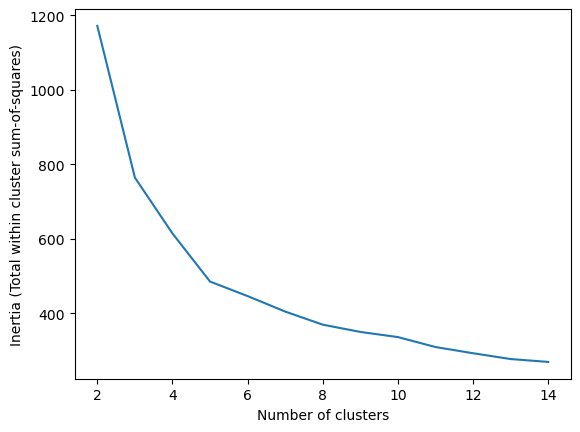

In [4]:
# Plot inertia values vs number of clusters to find elbow
fig, ax = plt.subplots(1,1)
ax.plot(list(range(2,15)), inertias)
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Inertia (Total within cluster sum-of-squares)")

In [5]:
# Elbows look like k = 3 and k = 5

# Record cluster assignments for k=3 and k=5
k3 = KMeans(3, random_state=0, max_iter=2000).fit_predict(X_numerical)
k5 = KMeans(5, random_state=0, max_iter=2000).fit_predict(X_numerical)

data["c3"] = pd.Series(k3)
data["c5"] = pd.Series(k5)

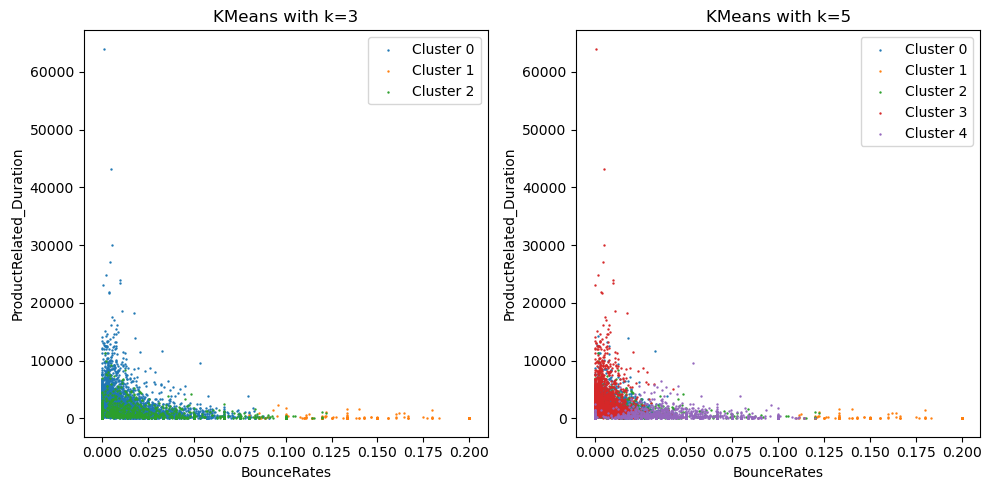

In [6]:
# Scatter plots of BounceRates vs ProductRelated_Duration with clusters indicated
# Scatter variables can be 

fig, axes = plt.subplots(1,2, figsize=(10,5))

cat1, cat2 = "BounceRates", "ProductRelated_Duration"
for i in range(3):
        mask = data["c3"] == i
        axes[0].scatter(data[mask][cat1], data[mask][cat2], s=0.5, label=f'Cluster {i}')
axes[0].set_title("KMeans with k=3")
axes[0].set_xlabel(cat1)
axes[0].set_ylabel(cat2)
axes[0].legend()
for i in range(5):
    mask = data["c5"] == i
    axes[1].scatter(data[mask][cat1], data[mask][cat2], s=0.5, label=f'Cluster {i}')
axes[1].set_title("KMeans with k=5")
axes[1].set_xlabel(cat1)
axes[1].set_ylabel(cat2)
axes[1].legend()
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Number of Visitors')

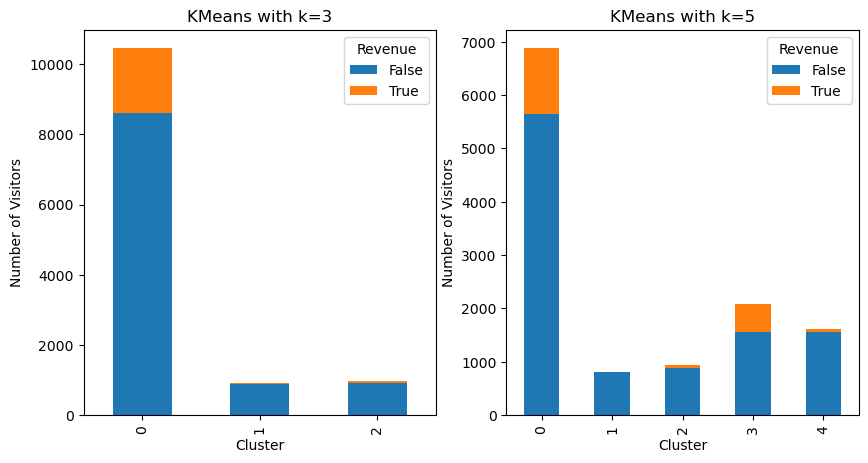

In [7]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

# Stacked bar charts to show how Revenue variable is distributed across clusters
cluster_counts3 = data.groupby(['c3', 'Revenue']).size().unstack(fill_value=0)
cluster_counts3.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("KMeans with k=3")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Number of Visitors")

cluster_counts5 = data.groupby(['c5', 'Revenue']).size().unstack(fill_value=0)
cluster_counts5.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title("KMeans with k=5")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Number of Visitors")

In [8]:
# As a small commentary, it seems that k=5 clusters might be more useful for classification
# In k=3, clusters 1 and 2 filter out ~2000 non-revenue visitors
# In k=5, clusters 1, 2, and 4 filter out ~3000 non-revenue visitors